# Module 4: Business Analytics Model Development

## Step 0. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:
# Create directories for outputs
os.makedirs("output2", exist_ok=True)

# Step 1. Load Cleaned Data

In [6]:
df = pd.read_csv('HR_Attrition_cleaned.csv')
print("Data loaded successfully. Shape:", df.shape)
df.head()

Data loaded successfully. Shape: (1470, 33)


Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  TenureBucket  \
0                        0                     5          5-10   
1                        1                     7          5-10   
2                        0                     0            <2   
3                        3                     0          5-10   
4                        2                     2            <2   

   IncomePerJobLevel  
0             2996.5  
1             2565.0  
2             2090.0  
3             2909.0  
4             3468.0  

[5 rows x 33 columns]

# Step 1a. Data Review

In [5]:
print(df.info())
print(df.describe())
print(df['Attrition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int64  
 2   BusinessTravel            1470 non-null   int64  
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   int64  
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   int64  
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   int64  
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   int64  
 14  JobSatis

# Step 2: Target Variable Distribution

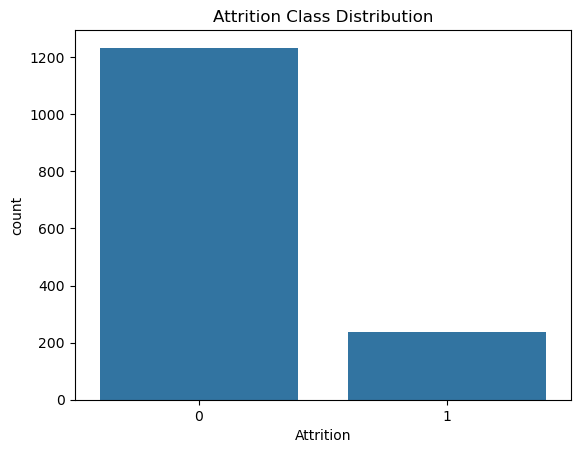

In [24]:
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Class Distribution')
plt.savefig("output2/Attrition_Count.png")  # save the plot
plt.show()

# Step 3. Split Data into Features and Target

In [9]:
X = df.drop(['Attrition', 'TenureBucket'], axis=1)  # Dropping 'TenureBucket' as it's a categorical bucket
y = df['Attrition']

# Step 4. Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Step 5: Standard Scaling

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6. Build Models

In [26]:
## Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [27]:
## Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]
print("Decision Tree model trained successfully.")

Decision Tree model trained successfully.


In [28]:
## Random Forest 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


# Step 7. Evaluate Models

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.04      0.08        47

    accuracy                           0.85       294
   macro avg       0.92      0.52      0.50       294
weighted avg       0.87      0.85      0.78       294

Confusion Matrix:


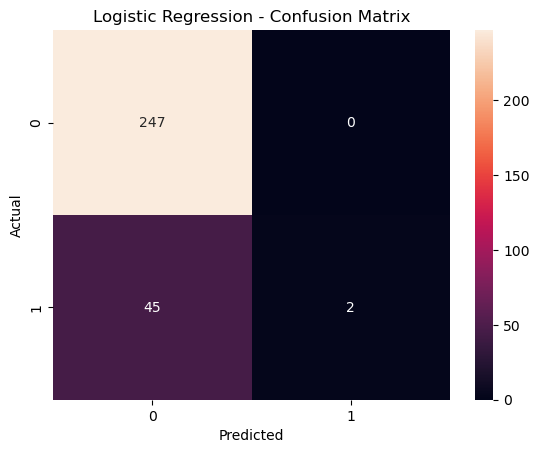

In [34]:
## Logistic Regression
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

# Save classification report to TXT
with open("output2/Log_Reg_Classification_Report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_lr))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("output2/Log_Reg_Confusion_Matrix.png")  # save the plot
plt.show()

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       247
           1       0.33      0.36      0.35        47

    accuracy                           0.78       294
   macro avg       0.60      0.61      0.61       294
weighted avg       0.79      0.78      0.79       294

Confusion Matrix:


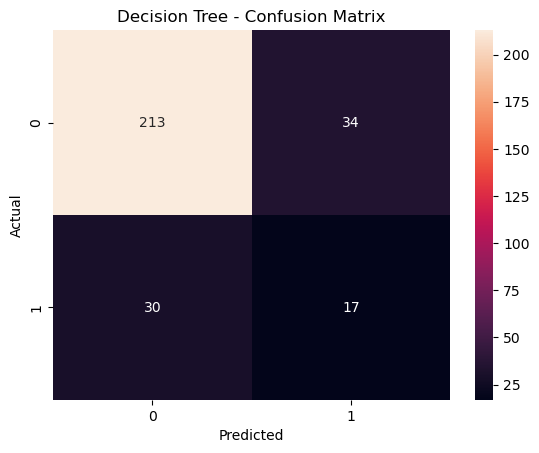

In [37]:
## Decision Tree
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

# Save classification report to TXT
with open("output2/Dec_Tre_Classification_Report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("output2/Dec_Tre_Confusion_Matrix.png")  # save the plot
plt.show()

Random Forest Results:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.40      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.62      0.53      0.52       294
weighted avg       0.78      0.83      0.79       294

Confusion Matrix:


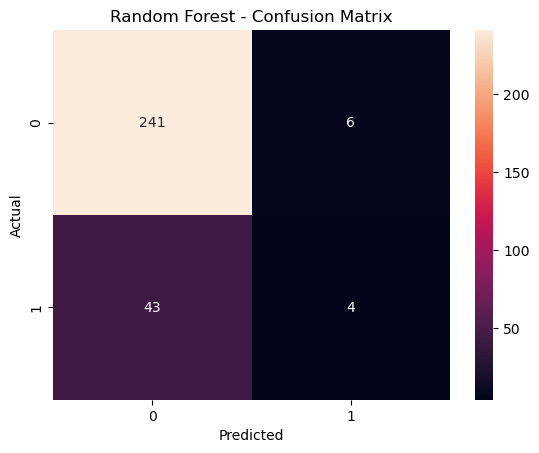

In [38]:
## Random Forest
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Save classification report to TXT
with open("output2/Ran_For_Classification_Report.txt", "w") as f:
    f.write(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("output2/Ran_For_Confusion_Matrix.png")  # save the plot
plt.show()

# Step 8. Final Observation

## Logistic Regression

- **Accuracy**: 85%
- **Confusion Matrix Highlight**:
    - Correctly predicted 247 out of 247 employees who did not leave (Class 0)
    - Failed to detect attrition: only 2 of 47 true attrition cases were predicted correctly
- **Precision (Class 1)**: 1.00
- **Recall (Class 1)**: 0.04
- **Interpretation**: Logistic regression had the highest overall accuracy (**85%**) and excellent precision for predicting non-attrition (class 0), but it performed poorly in identifying employees who actually left (class 1), with a recall of only **4%**. The model is heavily biased toward the majority class.


## Decision Tree

- **Accuracy**: 78%
- **Confusion Matrix Highlight**:
    - Correctly identified 213 non-attrition and 17 attrition cases
    - Missed 30 attrition cases and had 34 false positives
- **Precision (Class 1)**: 0.33
- **Recall (Class 1)**: 0.36
**Interpretation**: Decision Tree, while having the lowest accuracy (**78%**), demonstrated the **most balanced metrics**, achieving a recall of **36%** for class 1. This makes it significantly better at flagging employees at risk of attrition.
  

## Random Forest

  - **Accuracy**: 83%
- **Confusion Matrix Highlight**:
    - Correctly predicted 242 out of 247 employees who did not leave (Class 0)
    - Detected 4 out of 47 true attrition cases (Class 1)
- **Precision (Class 1)**: 0.40
- **Recall (Class 1)**: 0.09
- **Interpretation** Random Forest also had high accuracy (**83%**) but suffered from low recall for class 1 (**9%**), making it ineffective at identifying potential attrition despite its ensemble complexity. While better than Logistic Regression in identifying attrition, it is not as balanced as the Decision Tree.


---

## Model Selection Conclusion

In HR analytics, the **ability to correctly identify employees who are likely to leave (Attrition = 1)** is often more valuable than simply maintaining high accuracy.

> **Decision Tree is the preferred model** in this scenario due to its **balanced performance and higher recall** for class 1. It offers the best practical value for proactive HR planning, even if overall accuracy is slightly lower.
